In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import clustergraph.clustergraph as cg
import clustergraph.distances as d
import clustergraph.plotting as cp
import clustergraph.metric_distortion as md

In [16]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=[20, 80], centers=[[0,0], [10,10]], n_features=2, cluster_std=1,
                  random_state=42)

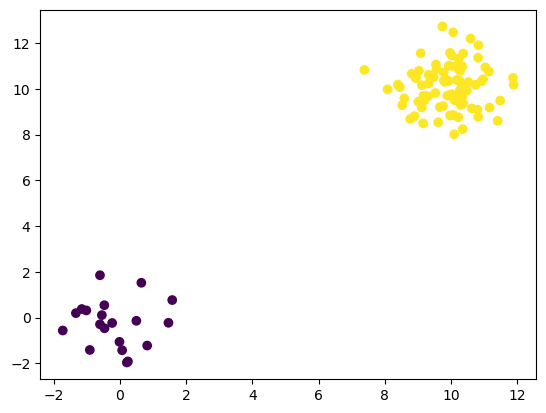

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y)

### NN graph

In [18]:
%%time

from sklearn.neighbors import NearestNeighbors
import networkx as nx


nb = 21
neigh = NearestNeighbors(n_neighbors = nb,  radius = 1)
neigh.fit(X=X)
nn_adjacency = neigh.kneighbors_graph(X= X , n_neighbors = nb, mode='distance')

nn_Graph = nx.from_scipy_sparse_array(nn_adjacency, edge_attribute = 'label')

## remove self edges
for node in nn_Graph.nodes:
    nn_Graph.remove_edge(node,node)
    
nx.number_connected_components(nn_Graph)

CPU times: user 11.4 ms, sys: 802 µs, total: 12.2 ms
Wall time: 11.5 ms


1

## ClusterGraph

In [19]:
cacca = cg.get_clusters_from_scikit(y)

[0 1]


In [20]:
label = ['min', 'max', 'avg']

for l in label:

    # Creation of the distance_between_clusters object
    distance_clusters_ = d.Creation_distances(clusters = cacca, X = X, metric_clusters = l).get_distance_cluster()

    # Creation of the object
    cluster_g_KM = cg.ClusterGraph(distance_clusters_)

    # Compute the distances between all the clusters
    cluster_g_KM.distances_clusters(normalize = False)

    km_dist = md.metric_distortion_edges_CG( cluster_g_KM.graph , nn_Graph, variable= 'label' , use_abs = False) 

    print("Score for ClusterGraph from KMeans using {} distance : ".format(l), km_dist )
    cluster_g_KM.graph.edges(data=True)

Score for ClusterGraph from KMeans using min distance :  -0.13801828574314828
Score for ClusterGraph from KMeans using max distance :  0.08377584685316343
Score for ClusterGraph from KMeans using avg distance :  -0.004975683717138935


In [21]:
label = ['min', 'max', 'avg']

for l in label:

    # Creation of the distance_between_clusters object
    distance_clusters_ = d.Creation_distances(clusters = cacca, X = X, metric_clusters = l).get_distance_cluster()

    # Creation of the object
    cluster_g_KM = cg.ClusterGraph(distance_clusters_)

    # Compute the distances between all the clusters
    cluster_g_KM.distances_clusters(normalize = False)

    km_dist = md.metric_distortion_edges_CG( cluster_g_KM.graph , nn_Graph, variable= 'label' , use_abs = True) 

    print("Score for ClusterGraph from KMeans using {} distance : ".format(l), km_dist )
    cluster_g_KM.graph.edges(data=True)

Score for ClusterGraph from KMeans using min distance :  0.13801828574314828
Score for ClusterGraph from KMeans using max distance :  0.08381553031262307
Score for ClusterGraph from KMeans using avg distance :  0.031068248586988156


In [8]:
dm = md.metric_distortion_matrix( cluster_g_KM.graph , nn_Graph, variable= 'label' ) 
dm

TypeError: distortion_two_clusters() missing 1 required positional argument: 'use_abs'